In [52]:
# Import Dependencies
from main import DataLoader
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [53]:
from main import OutputFilePhysicianData

In [54]:
physician_data=DataLoader.LoadFile(OutputFilePhysicianData)
physician_data.head()

C:\Users\jules\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,NPI,Individual Pac ID,Last Name,First Name,Gender,Medical School,Graduation Yr,Primary Speciality,Organization Name,Organization Pac ID,...,Address ln 2,ln_2_sprs,City,State,Zip,Phone No.,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
0,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,GLENVIEW,IL,600261301,NaN,92.6,100.0,40.0,95.6
1,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,Y,GLENVIEW,IL,600261301,NaN,92.6,100.0,40.0,95.6
2,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,HIGHLAND PARK,IL,600352433,8.474328e+09,92.6,100.0,40.0,95.6
3,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,HIGHALND PARK,IL,600352433,NaN,92.6,100.0,40.0,95.6
4,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,Y,EVANSTON,IL,602011718,NaN,92.6,100.0,40.0,95.6


In [55]:
#Get rows with unique NPIs
unique_pnpi=physician_data.drop_duplicates(subset='NPI',keep="last")
unique_pnpi

,NPI,Individual Pac ID,Last Name,First Name,Gender,Medical School,Graduation Yr,Primary Speciality,Organization Name,Organization Pac ID,...,Address ln 2,ln_2_sprs,City,State,Zip,Phone No.,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
5,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,EVANSTON,IL,602014205,8.478691e+09,92.6,100.0,40.0,95.6
7,1003000522,4284705781,WEIGAND,FREDERICK,M,OTHER,1965.0,FAMILY MEDICINE,SOUTHWEST VOLUSIA HEALTHCARE CORPORATION,4.461533e+08,...,SUITE 200,NaN,ORANGE CITY,FL,327638360,3.869178e+09,93.6,100.0,40.0,96.2
8,1003000597,4082848189,KIM,DAE,M,STATE UNIVERSITY OF NEW YORK AT BUFFALO SCHOOL...,2007.0,UROLOGY,AHS OKLAHOMA PHYSICIAN GROUP LLC,9.436122e+09,...,SUITE 701,NaN,TULSA,OK,741044019,9.185827e+09,97.9,100.0,40.0,98.8
10,1003000704,2365611035,GATTON,ZACHARY,M,OTHER,2007.0,ANESTHESIOLOGY,KNOX COMMUNITY HOSPITAL,1.153302e+09,...,FL 5,NaN,MOUNT VERNON,OH,430501440,NaN,90.9,91.8,40.0,93.0
12,1003000902,1153415187,LOHANO,JAIVANTI,F,OTHER,1996.0,FAMILY MEDICINE,BAPTIST HEALTH MEDICAL GROUP INC,5.597867e+09,...,62 LOUISVILLE CARDIOLOGY GROUP,NaN,MADISON,IN,472507328,8.128011e+09,94.6,86.7,40.0,93.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893919,1992998207,7719179191,SHANE,ANITA,F,BAYLOR COLLEGE OF MEDICINE,2006.0,OPHTHALMOLOGY,MANATEE SARASOTA EYE CLINIC PA,2.466415e+09,...,NaN,NaN,BRADENTON,FL,342081931,9.417482e+09,27.9,0.0,0.0,16.8
893920,1992998645,547342438,MARUPUDI,SESHASREE,F,OTHER,2001.0,INTERNAL MEDICINE,NaN,NaN,...,SUITE 300,NaN,SHENANDOAH,TX,773843024,NaN,86.5,69.6,40.0,84.1
893921,1992998736,4880718444,LANGLEY,ADAM,M,OTHER,2007.0,FAMILY MEDICINE,"PREMIER FAMILY AND SPORTS MEDICINE, LLC",9.032361e+09,...,SUITE 200,NaN,OCOEE,FL,347614751,4.075819e+09,92.4,93.0,40.0,93.7
893923,1992999122,4284728882,JOHNSON,CHARLES,M,PHILADELPHIA COLLEGE OF OSTEOPATHIC MEDICINE,1983.0,INTERNAL MEDICINE,NaN,NaN,...,SUITE 155,NaN,BOCA RATON,FL,334875715,NaN,59.0,93.0,40.0,73.7


In [56]:
# GroupBy Physician Gender
grouped_gender=unique_pnpi.groupby(['Gender'])
avg_gendermips=grouped_gender["Final MIPS Score"].mean()
avg_gendermips

Gender
F    78.551816
M    76.018787
Name: Final MIPS Score, dtype: float64

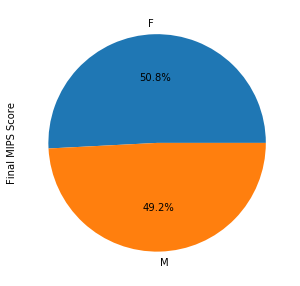

In [58]:
#Gender distribution of MIPS score
plot = avg_gendermips.plot.pie(figsize=(5,5),autopct='%1.1f%%') 
plt.savefig("./Images/gender_dist_MIPS.png")

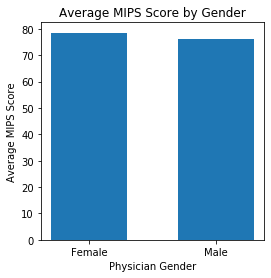

In [59]:
# Create a bar chart based off of the group series 
gender=["Female","Male"]
positions=[0,1]
fig = plt.figure(figsize=(4,4))
plt.bar(positions, avg_gendermips,width=0.6)
plt.xticks(positions,gender,rotation='horizontal')
plt.title("Average MIPS Score by Gender")
plt.xlabel("Physician Gender")
plt.ylabel("Average MIPS Score")
plt.savefig("./Images/gender_AvgMIPS.png")
plt.show()

In [64]:
# Group MIPS score by State
grouped_state=unique_pnpi.groupby(['State'])
avg_statemips=grouped_state["Final MIPS Score"].mean()
avg_statemips.nlargest(60)

State
WI    90.617209
MN    89.509295
ND    88.888249
ME    86.630244
UT    86.010284
SD    84.817689
NC    83.969357
PA    83.863556
WA    83.779342
IL    82.811377
IA    82.591023
VT    82.275748
MO    82.227331
OH    82.222047
NH    81.916035
NE    81.846582
VA    81.750246
IN    81.387245
OR    80.728823
DC    80.474080
MA    80.313323
CT    79.987148
MT    79.895458
KS    79.439786
DE    79.394904
KY    78.929000
MI    78.691873
WY    78.525594
MD    78.339714
NM    77.609190
OK    76.485851
CO    76.473741
NY    76.328319
ID    76.075660
MS    76.061733
SC    75.997333
TN    75.990192
AK    75.625000
AR    74.719448
NJ    74.079988
AZ    73.597423
WV    72.534509
GA    71.913395
LA    70.742203
AL    70.447188
CA    69.567536
TX    69.475189
NV    69.022143
HI    68.157962
FL    67.520327
GU    67.415789
RI    62.940909
MP    61.907143
VI    37.171429
PR    13.843551
Name: Final MIPS Score, dtype: float64

In [61]:
#ount of MIPS Scores for unique NPI by state
count_statemips=grouped_state["Final MIPS Score"].count()
count_statemips.nlargest(50)

State
FL    27180
CA    26466
TX    22873
NY    21099
PA    16705
IL    13976
NC    12042
NJ    12013
OH    11920
MI    11283
GA    10795
VA     9539
WA     7624
MD     7282
IN     7260
TN     7015
MO     6725
WI     6665
AZ     6636
MA     6215
SC     6111
CT     5509
AL     5495
LA     5194
KY     5038
MN     4583
CO     3892
OK     3880
KS     3637
MS     3635
AR     3224
IA     3119
OR     3015
UT     2538
NV     2371
NE     2209
WV     2127
NH     2058
ME     1964
NM     1828
DE     1452
ID     1364
MT     1255
SD     1125
HI     1099
VT      936
ND      851
RI      770
WY      758
AK      720
Name: Final MIPS Score, dtype: int64

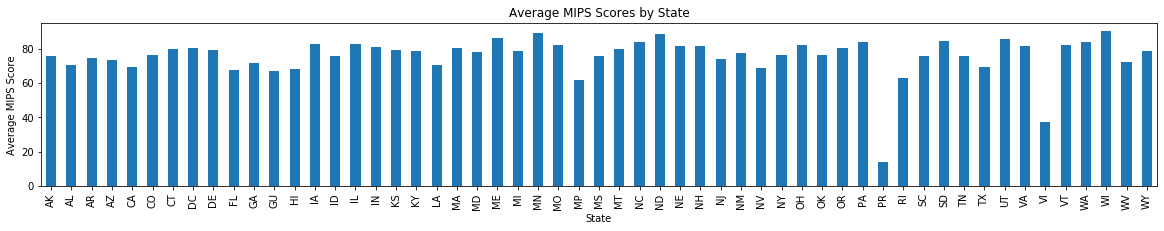

In [62]:
multi_plot = avg_statemips.plot(kind="bar", figsize=(20,3))
multi_plot.set_ylabel('Average MIPS Score')
multi_plot.set_title('Average MIPS Scores by State')
plt.savefig("./Images/State_AvgMIPS.png")

In [63]:
# GroupBy Medical School
grouped_medschool=unique_pnpi.groupby(['Medical School'])
avg_medschoolmips=grouped_medschool["Final MIPS Score"].mean()
avg_medschoolmips.nlargest(20)

Medical School
ATLANTIC MEDICAL COLLEGE                                100.000
CENTRAL MEDICAL COLLEGE OF ST. JOSEPH - NLG             100.000
COLLEGE OF PHYSICIANS AND SURGEONS (TENNESSEE)          100.000
UNIVERSITY OF WOOSTER MEDICAL DEPARTMENT                100.000
BEAUMONT HOSPITAL MEDIAL COLLEGE - NLG                   99.500
UNIVERSITY OF ALBERTA FACULTY OF DENTISTRY               99.000
UNIVERSITY OF COLORADO SCHOOL OF DENTISTRY               99.000
WILLIAMETTE UNIVERSITY MEDICAL DEPARTMENT                98.600
FLINT MEDICAL COLLEGE OR NEW ORLEANS UNIVERSITY          98.125
UNIV OF MISSOURI-KANSAS CITY SCHOOL OF DENTISTRY         97.600
BALTIMORE UNIVERSITY SCHOOL OF MEDICINE                  97.550
BOWDOIN MEDICAL SCHOOL                                   97.500
UNIV OF BRITISH COLUMBIA FACULTY OF DENTISTRY            97.000
MEDICAL COLLEGE OF GEORGIA SCHOOL OF DENTISTRY           96.850
COLLEGE OF PHYSICIANS AND SURGEONS (CALIFORNIA)          96.500
ADIO/PENNSYLVANIA INSTITU